In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# It relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv('../Data/TimeSeriesData/Alcohol_Sales.csv', index_col=0, parse_dates=True)

In [4]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [6]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [7]:
len(df)

325

In [8]:
(df.isna().sum()).sum()

0

<Axes: xlabel='DATE'>

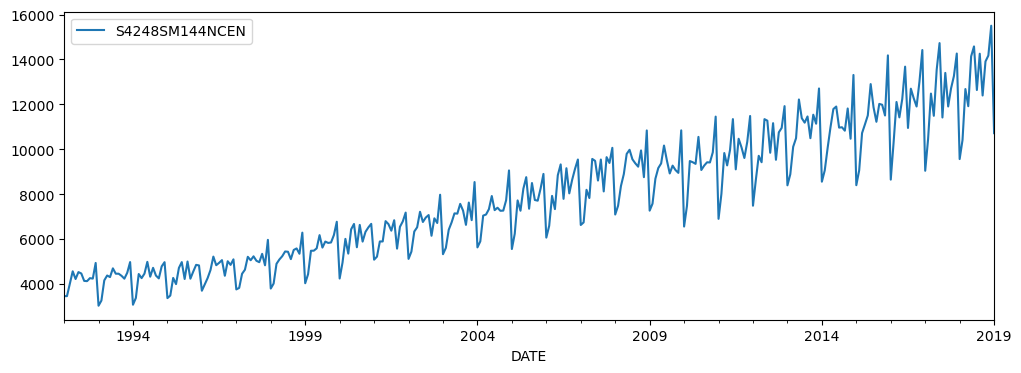

In [9]:
df.plot(figsize=(12, 4))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   S4248SM144NCEN  325 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [11]:
y = df['S4248SM144NCEN'].values.astype(float)

In [12]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [13]:
test_size = 12

In [14]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [15]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [18]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(feature_range=(-1, 1))

In [19]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [20]:
train_norm

array([[-0.92683135],
       [-0.92700231],
       [-0.83400291],
       [-0.73792632],
       [-0.79656381],
       [-0.74390974],
       [-0.75467989],
       [-0.81092401],
       [-0.81280451],
       [-0.79006753],
       [-0.79331567],
       [-0.67433114],
       [-1.        ],
       [-0.9606804 ],
       [-0.80699205],
       [-0.76989486],
       [-0.7818617 ],
       [-0.71536029],
       [-0.75604753],
       [-0.75621848],
       [-0.77211727],
       [-0.79399949],
       [-0.74886742],
       [-0.66783486],
       [-0.99247799],
       [-0.94084965],
       [-0.75861185],
       [-0.78972562],
       [-0.75570562],
       [-0.66595436],
       [-0.77895547],
       [-0.71142833],
       [-0.77040773],
       [-0.79194803],
       [-0.70031627],
       [-0.66834772],
       [-0.94204633],
       [-0.92255748],
       [-0.78835798],
       [-0.83537054],
       [-0.71211215],
       [-0.66783486],
       [-0.7962219 ],
       [-0.66339003],
       [-0.79417044],
       [-0

In [ ]:
# train_size = len(y) - test_size - window_size

In [21]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [22]:
train_norm

tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
        -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607, -0.8070, -0.7699,
        -0.7819, -0.7154, -0.7560, -0.7562, -0.7721, -0.7940, -0.7489, -0.6678,
        -0.9925, -0.9408, -0.7586, -0.7897, -0.7557, -0.6660, -0.7790, -0.7114,
        -0.7704, -0.7919, -0.7003, -0.6683, -0.9420, -0.9226, -0.7884, -0.8354,
        -0.7121, -0.6678, -0.7962, -0.6634, -0.7942, -0.7396, -0.6889, -0.6931,
        -0.8858, -0.8373, -0.7896, -0.7285, -0.6260, -0.6914, -0.6735, -0.6528,
        -0.7719, -0.6613, -0.6890, -0.6468, -0.8757, -0.8643, -0.7567, -0.7258,
        -0.6275, -0.6536, -0.6239, -0.6576, -0.6685, -0.6049, -0.6923, -0.4984,
        -0.8692, -0.8311, -0.6808, -0.6480, -0.6229, -0.5870, -0.5890, -0.6451,
        -0.5753, -0.5637, -0.6042, -0.4435, -0.8289, -0.7600, -0.5815, -0.5808,
        -0.5630, -0.4623, -0.5572, -0.5114, -0.5218, -0.5182, -0.4617, -0.3606,
        -0.7928, -0.6716, -0.4911, -0.60

In [23]:
window_size = 12

In [25]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))

    return out

In [26]:
train_data = input_data(train_norm, window_size)

In [27]:
len(train_data)

301

In [28]:
325-12-12

301

In [29]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

In [30]:
train_data

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607])),
 (tensor([-0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901,
          -0.7933, -0.6743, -1.0000, -0.9607]),
  tensor([-0.8070])),
 (tensor([-0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933,
          -0.6743, -1.0000, -0.9607, -0.8070]),
  tensor([-0.7699])),
 (tensor([-0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743,
          -1.0000, -0.9607, -0.8070, -0.7699]),
  tensor([-0.7819])),
 (tensor([-0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000,
          -0.9607, -0.8070, -0.7699, -0.7819]),
  tensor([-0.7154])),
 (tensor([-0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607,
          

In [31]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [32]:
torch.manual_seed(101)

model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [34]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):

    for seq, y_train in train_data:

        optimizer.zero_grad()

        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch} Loss {loss.item()}')

total_time = time.time() - start_time
print(f'Total duration time is {total_time}')

Epoch 0 Loss 0.2531021535396576
Epoch 1 Loss 0.3753201365470886
Epoch 2 Loss 0.39027199149131775
Epoch 3 Loss 0.3493471145629883
Epoch 4 Loss 0.3308565020561218
Epoch 5 Loss 0.3322996199131012
Epoch 6 Loss 0.3267035484313965
Epoch 7 Loss 0.32074129581451416
Epoch 8 Loss 0.30653542280197144
Epoch 9 Loss 0.29518038034439087
Epoch 10 Loss 0.26934343576431274
Epoch 11 Loss 0.25998491048812866
Epoch 12 Loss 0.24665886163711548
Epoch 13 Loss 0.2240440398454666
Epoch 14 Loss 0.1860244870185852
Epoch 15 Loss 0.18561410903930664
Epoch 16 Loss 0.172093465924263
Epoch 17 Loss 0.25161007046699524
Epoch 18 Loss 0.2255743145942688
Epoch 19 Loss 0.17446908354759216
Epoch 20 Loss 0.20233970880508423
Epoch 21 Loss 0.20824411511421204
Epoch 22 Loss 0.16652560234069824
Epoch 23 Loss 0.17585572600364685
Epoch 24 Loss 0.1198873445391655
Epoch 25 Loss 0.0932178795337677
Epoch 26 Loss 0.04266306385397911
Epoch 27 Loss 0.04846348613500595
Epoch 28 Loss 3.770963758142898e-06
Epoch 29 Loss 0.06310165673494339
E

In [36]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        preds.append(model(seq).item())

In [37]:
preds[window_size:]

[0.19580943882465363,
 0.691112756729126,
 0.4739615321159363,
 0.8261128067970276,
 1.2114450931549072,
 0.39614570140838623,
 0.8164644837379456,
 0.48284369707107544,
 0.6592593789100647,
 0.8168233633041382,
 0.9574845433235168,
 0.1096619963645935]

In [39]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

In [40]:
true_predictions

array([[10025.8873124 ],
       [12923.16407049],
       [11652.93798211],
       [13712.84686336],
       [15966.84807241],
       [11197.75428039],
       [13656.40899763],
       [11704.89420602],
       [12736.83773693],
       [13658.50826365],
       [14481.30583617],
       [ 9521.96784773]])

In [41]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [43]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]')

In [44]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [45]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

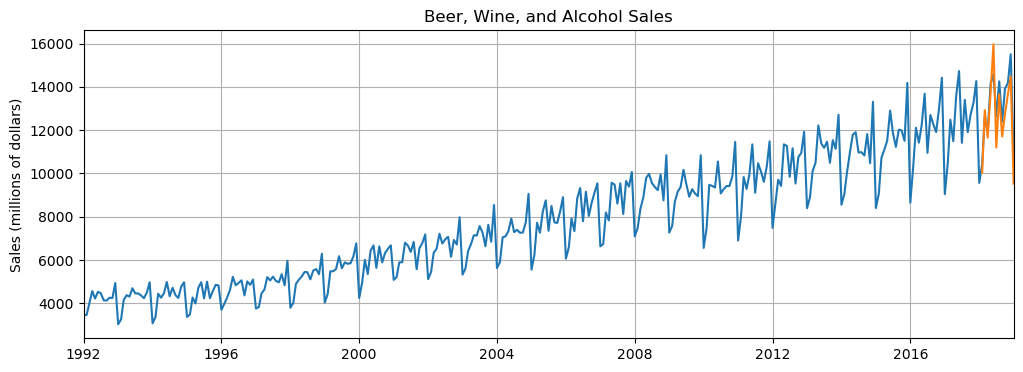

In [46]:
plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

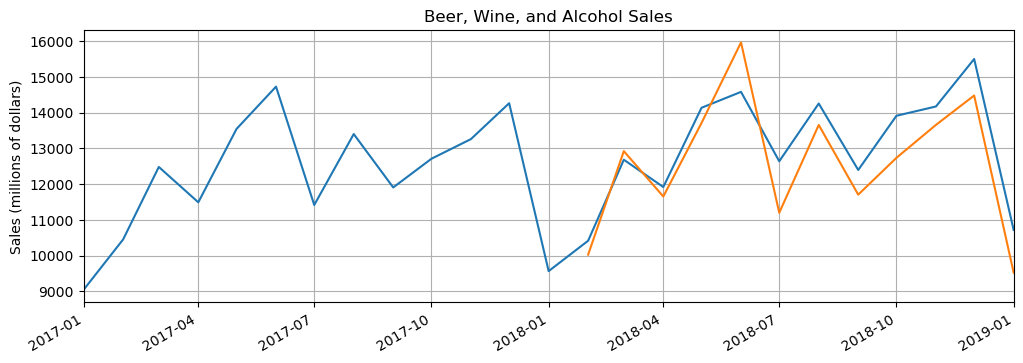

In [47]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

# Forecast into an unknown future

##### We'll continue training the model using the entire dataset, and predict 12 steps into the future.

In [48]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.02588228
Epoch:  2 Loss: 0.03699738
Epoch:  3 Loss: 0.01838034
Epoch:  4 Loss: 0.02058200
Epoch:  5 Loss: 0.02578948
Epoch:  6 Loss: 0.02285250
Epoch:  7 Loss: 0.02028192
Epoch:  8 Loss: 0.01592601
Epoch:  9 Loss: 0.01542227
Epoch: 10 Loss: 0.01551447
Epoch: 11 Loss: 0.01781363
Epoch: 12 Loss: 0.02056216
Epoch: 13 Loss: 0.02346208
Epoch: 14 Loss: 0.02371698
Epoch: 15 Loss: 0.00999500
Epoch: 16 Loss: 0.00672882
Epoch: 17 Loss: 0.01172082
Epoch: 18 Loss: 0.00890337
Epoch: 19 Loss: 0.00494071
Epoch: 20 Loss: 0.00910502
Epoch: 21 Loss: 0.00592040
Epoch: 22 Loss: 0.01984366
Epoch: 23 Loss: 0.00644085
Epoch: 24 Loss: 0.00506880
Epoch: 25 Loss: 0.00425320
Epoch: 26 Loss: 0.00584218
Epoch: 27 Loss: 0.00317390
Epoch: 28 Loss: 0.00372887
Epoch: 29 Loss: 0.00489621
Epoch: 30 Loss: 0.00573943
Epoch: 31 Loss: 0.00824085
Epoch: 32 Loss: 0.00340285
Epoch: 33 Loss: 0.00332464
Epoch: 34 Loss: 0.00381379
Epoch: 35 Loss: 0.00819957
Epoch: 36 Loss: 0.00360487
Epoch: 37 Loss: 0.00568929
E

In [49]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (torch.zeros(1, 1, model.hidden_size),
                        torch.zeros(1, 1, model.hidden_size))

        preds.append(model(seq).item())  

In [50]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [51]:
true_predictions

array([[10415.00001808],
       [12683.00013363],
       [11919.00006013],
       [14137.99993426],
       [14583.00009555],
       [12640.00017402],
       [14257.00005591],
       [12395.9999277 ],
       [13913.99994579],
       [14173.99995232],
       [15504.        ],
       [10717.99998423],
       [10436.86187156],
       [12915.61483431],
       [12464.10280555],
       [14310.98075333],
       [13813.33810234],
       [12766.16379595],
       [14115.34296235],
       [12616.62726098],
       [13070.54657674],
       [14228.39066172],
       [15154.01667592],
       [11209.02194545]])

In [52]:
np.array(preds)

array([0.18399744, 0.54766297, 0.42515835, 0.78096688, 0.85232103,
       0.54076809, 0.80004811, 0.50164354, 0.7450493 , 0.78673935,
       1.        , 0.23258238, 0.18750291, 0.58496189, 0.51256359,
       0.80870372, 0.72890854, 0.56099796, 0.77733392, 0.53702033,
       0.60980463, 0.7954607 , 0.94388145, 0.31131595])

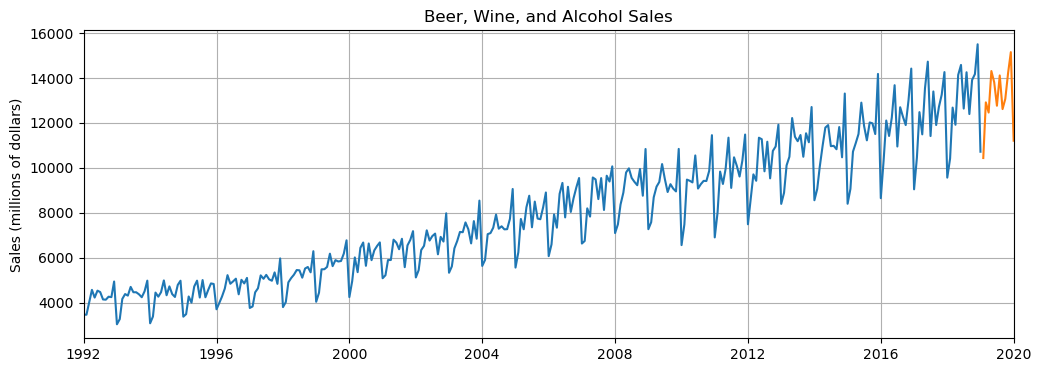

In [53]:
# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')


plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

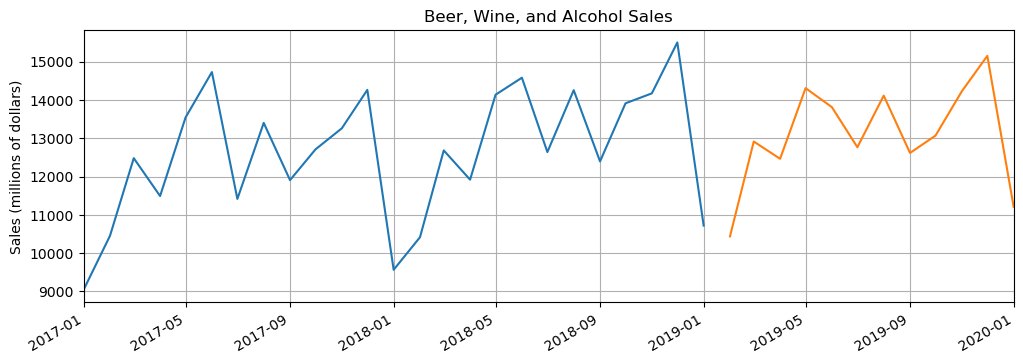

In [54]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()